In [1]:
%pylab inline
%load_ext music21.ipython21

Populating the interactive namespace from numpy and matplotlib


In [2]:
from music21 import *
import seaborn as sns
from matplotlib import gridspec

import sys
sys.path.append('/home/fl350/bachbot/scripts')
from datasets import standardize_key

In [23]:
QUANTIZE_QUARTER_NOTE_SUBDIVISION = 2

catalog = stream.Opus()
catalog_transpose = stream.Opus() # transposed to Cmaj/Amin
catalog_transpose_quantize = stream.Opus() # transposed and quantized
for workName in corpus.getBachChorales():
    work = converter.parse(workName)
    firstTS = work.flat.getTimeSignatures()[0]
    if firstTS.ratioString == '4/4': #Filter for every Bach chorale that is in 4/4
        catalog.append(work)
        transposed = datasets.standardize_key(work)
        catalog_transpose.append(transposed)
        catalog_transpose_quantize.append(transposed.quantize((2,)))

In [69]:
# find a score that has 16th notes which will be quantized away
#s = filter(lambda s: 0.25 in set(map(lambda x: x.duration.quarterLength, s.measures(0, 3).flat.notes)), catalog)

In [80]:
s = corpus.parse('bwv133.6')

print s.metadata.title

bwv133.6.xml


Standard music score notation

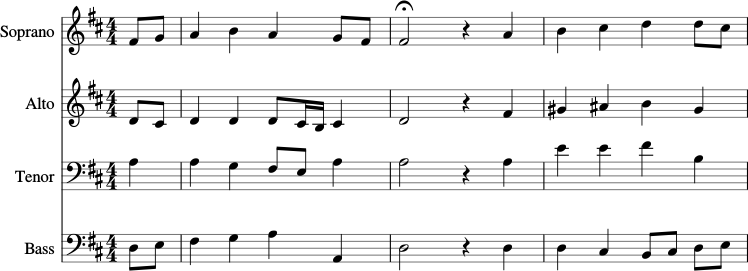

In [138]:
s_subset = s.measures(0, 3)
#s_subset.write('lily.svg', 'bwv133-6-original.svg')
s_subset.write('musicxml.png', 'bwv133-6-original-score.xml')
s_subset.show()

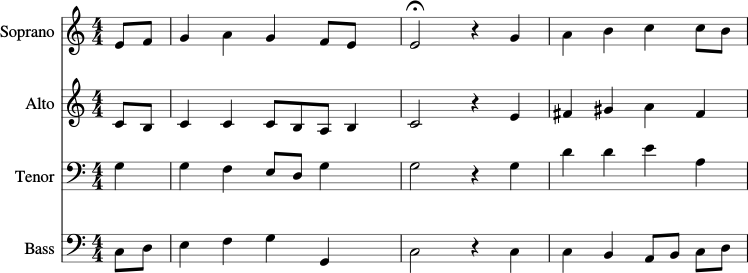

In [142]:
s_subset_processed = standardize_key(s_subset).quantize((2,))
s_subset_processed.write('musicxml.png', 'bwv133-6-preproc-score.xml')
s_subset_processed.show()

Piano roll representation

In [77]:
def plot_piano_roll(s):
    g = graph.PlotHorizontalBarPitchSpaceOffset(s)
    data, xTicks, _ = g._extractData()

    plt.figure(figsize=(18,6))
    #plt.subplots_adjust(left=0.15)   

    yPos = 0
    xPoints = [] # store all to find min/max
    yTicks = [] # a list of label, value pairs

    colors = sns.color_palette("muted")

    keys = []
    i = 0
    for i, (key, points) in enumerate(data):
        keys.append(key)
        if len(points) > 0:
            yrange = (yPos + 1, 1)
            plt.broken_barh(points,
                            yrange,
                            facecolor=colors[i%len(colors)],
                            alpha=0.8)
            for xStart, xLen in points:
                xEnd = xStart + xLen
                for x in [xStart, xEnd]:
                    if x not in xPoints:
                        xPoints.append(x)
        yTicks.append([yPos + 1 * .5, key])
        yPos += 1
        i += 1

    xMin = min(xPoints)
    xMax = max(xPoints) 
    xRange = xMax - xMin

    plt.ylim(0, len(keys) * 1)
    plt.xlim(xMin - 4, xMax + 4)
    plt.yticks(*zip(*yTicks))
    plt.xticks(*zip(*xTicks))

    plt.title('Piano roll')
    plt.xlabel('Measure number')
    plt.ylabel('Pitch')

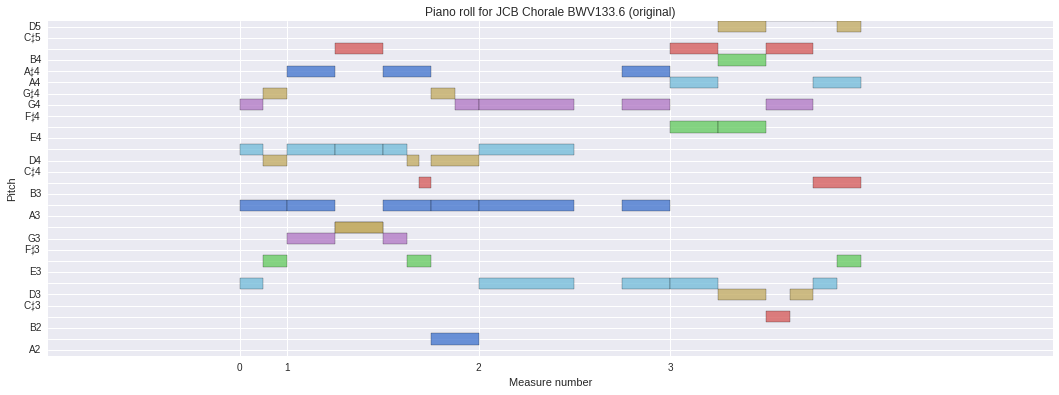

In [134]:
plot_piano_roll(s_subset)
plt.title('Piano roll for JCB Chorale BWV133.6 (original)')
plt.savefig('bwv133-6-original-piano-roll.png')
plt.show()

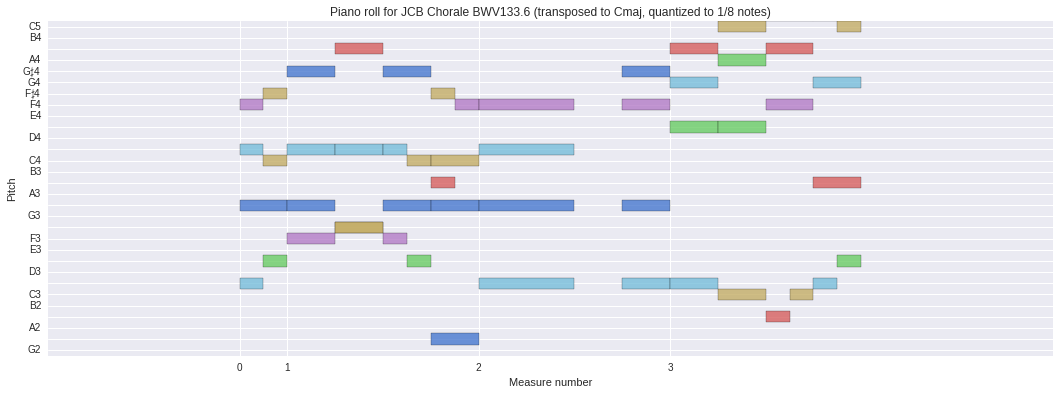

In [135]:
plot_piano_roll(s_subset_processed)
plt.title('Piano roll for JCB Chorale BWV133.6 (transposed to Cmaj, quantized to 1/{} notes)'.format(4*QUANTIZE_QUARTER_NOTE_SUBDIVISION))
plt.savefig('bwv133-6-preproc-piano-roll.png')
plt.show()

Meter profile of JCB: very regular at quarter or eighth positions within a measure, partially justifies quantization

In [95]:
#Count usages
allbeats = list();
for p in catalog.flat.notes:
    for counter in range(len(p.pitches)):
        allbeats.append(p.beat - 1)

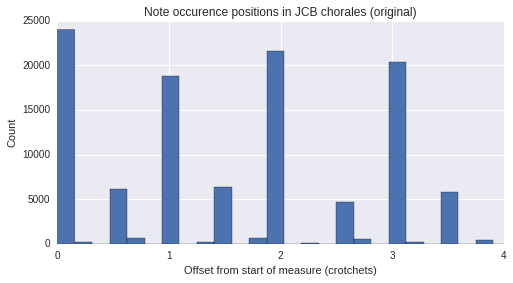

In [130]:
plt.figure(figsize=(8,4))
plt.hist(allbeats, bins=32, range=(0,5))
plt.xlabel("Offset from start of measure (crotchets)")
plt.ylabel("Count")
plt.title('Note occurence positions in JCB chorales (original)')
plt.xlim(0,4)
plt.xticks(np.arange(0, 5, 1.0))
plt.savefig('meter-usage-original.png')
plt.show() 

In [103]:
#Count usages
allbeats_quantized = list();
for p in catalog_transpose_quantize.flat.notes:
    for counter in range(len(p.pitches)):
        allbeats_quantized.append(p.beat - 1)

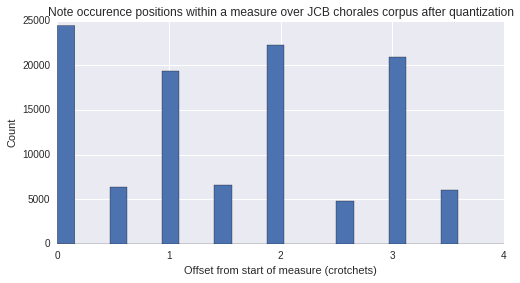

In [131]:
plt.figure(figsize=(8,4))
plt.hist(allbeats_quantized, bins=32, range=(0,5))
plt.xlabel("Offset from start of measure (crotchets)")
plt.ylabel("Count")
plt.title('Note occurence positions within a measure over JCB chorales corpus after quantization')
plt.xlim(0,4)
plt.xticks(np.arange(0, 5, 1.0))
plt.savefig('meter-usage-quantized.png')
plt.show() 

Note lengths: justify quantization to 8th or 16th notes

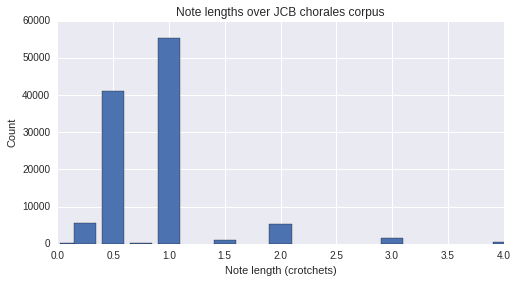

In [133]:
plt.figure(figsize=(8,4))

data, xTicks, _ = graph.PlotHistogramQuarterLength(catalog)._extractData()
plt.bar(*zip(*data), width=0.2, align='center')
plt.xlabel('Note length (crotchets)')
plt.xlim(0,4)
plt.ylabel('Count')
plt.title('Note lengths over JCB chorales corpus')

plt.savefig('note-lengths-original.png')
plt.show()

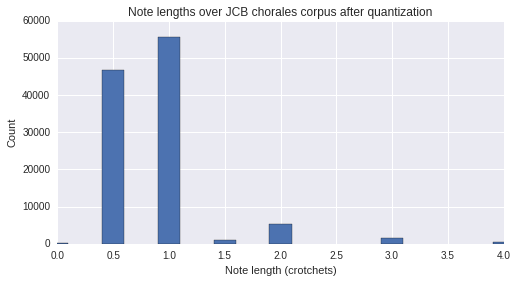

In [132]:
plt.figure(figsize=(8,4))

data, xTicks, _ = graph.PlotHistogramQuarterLength(catalog_transpose_quantize)._extractData()
plt.bar(*zip(*data), width=0.2, align='center')
plt.xlabel('Note length (crotchets)')
plt.xlim(0,4)
plt.ylabel('Count')
plt.title('Note lengths over JCB chorales corpus after quantization')

plt.savefig('note-lengths-quantized.png')
plt.show()

Pitch usage profile

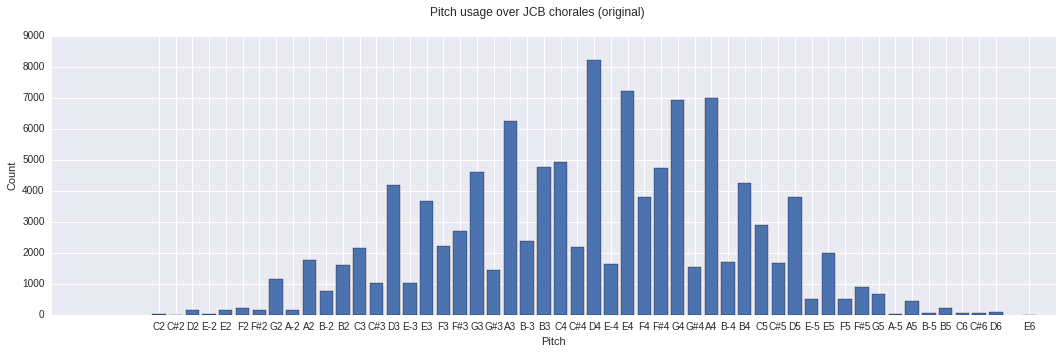

In [98]:
plt.figure(figsize=(18,5))

data, xTicks, _ = graph.PlotHistogramPitchSpace(catalog)._extractData()
plt.bar(*zip(*data))
plt.xticks(*zip(*xTicks))
plt.xlabel('Pitch')
plt.ylabel('Count')
plt.suptitle('Pitch usage over JCB chorales (original)')

plt.savefig('pitch-usage-original.png')
plt.show()

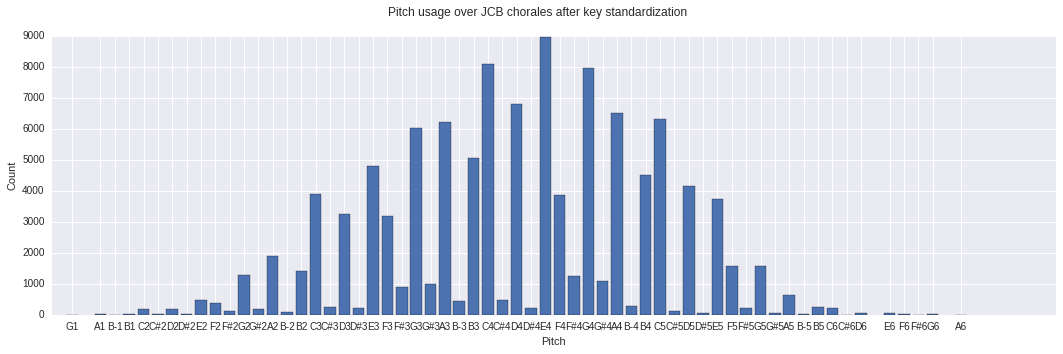

In [111]:
plt.figure(figsize=(18,5))

data, xTicks, _ = graph.PlotHistogramPitchSpace(catalog_transpose_quantize)._extractData()
plt.bar(*zip(*data))
plt.xticks(*zip(*xTicks))
plt.xlabel('Pitch')
plt.ylabel('Count')
plt.suptitle('Pitch usage over JCB chorales after key standardization')

plt.savefig('pitch-usage-preproc.png')
plt.show()

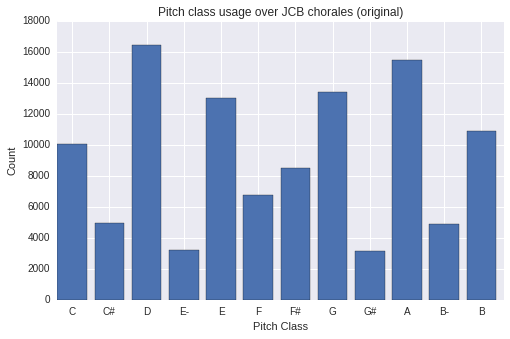

In [99]:
plt.figure(figsize=(8,5))

data, xTicks, _ = graph.PlotHistogramPitchClass(catalog)._extractData()
plt.bar(*zip(*data))
plt.xticks(*zip(*xTicks))
plt.xlabel('Pitch Class')
plt.ylabel('Count')
plt.suptitle('Pitch class usage over JCB chorales (original)')

plt.savefig('pitch-class-usage-original.png')
plt.show()

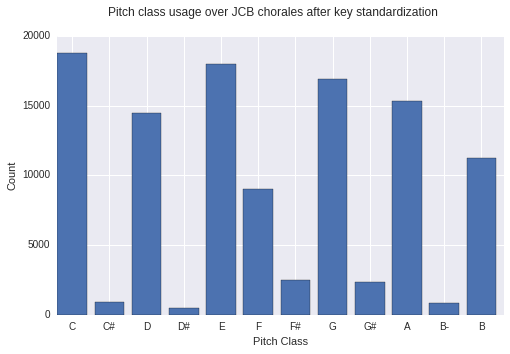

In [112]:
plt.figure(figsize=(8,5))

data, xTicks, _ = graph.PlotHistogramPitchClass(catalog_transpose_quantize)._extractData()
plt.bar(*zip(*data))
plt.xticks(*zip(*xTicks))
plt.xlabel('Pitch Class')
plt.ylabel('Count')
plt.suptitle('Pitch class usage over JCB chorales after key standardization')

plt.savefig('pitch-class-usage-preproc.png')
plt.show()

Zipf distribution over (Note,Duration) tuples

In [201]:
data, xTicks, yTicks = graph.PlotScatterWeightedPitchClassQuarterLength(catalog)._extractData()

#data, xTicks, yTicks = graph.PlotScatterWeightedPitchClassQuarterLength(catalog_transpose_quantize)._extractData()

In [ ]:
import pandas as pd

#data, xTicks, yTicks = graph.PlotScatterWeightedPitchClassQuarterLength(catalog_transpose_quantize)._extractData()
df = pd.DataFrame(data, columns=('x', 'y', 'sz'))
counts = df['sz'].sort_values(ascending=False)

plt.figure(figsize=(14,4))

subplot(1,2,1)
plt.plot(range(len(counts)), counts)
plt.xlabel('Rank')
plt.ylabel('Count')

subplot(1,2,2)
plt.plot(log(range(len(counts))), log(counts))
plt.xlabel('log Rank')
plt.ylabel('log Count')
plt.suptitle("(Pitch,Duration) tuples are more concentrated than power law distributions would predict: Zipf's law doesn't hold")

plt.savefig('zipf-law-note-tuples.png')
plt.show()